In [1]:
//#import package////

import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix

In [3]:
#import metadata
META = pd.read_excel('Strain_data.xlsx', sheetname='Strain info',index_col=0)

In [4]:
META_Strains=META.index
print META_Strains

Index([u'12-1-TI12', u'12-2-TI13', u'18-3-TI5', u'18-4-TI12', u'3_2_53FAA',
       u'33-1-TI5', u'36-1-TI13', u'39-2-TI18', u'41-2-TI13', u'46-1-TI2',
       ...
       u'Shigella_flexneri_5_str_8401', u'Shigella_sonnei_Ss046', u'UC37',
       u'UC5', u'UM128', u'UM131', u'UM141', u'UM146', u'UM147', u'CG1MAC'],
      dtype='object', name=u'Strain', length=110)


In [5]:
#import pan genome matrix
base_matrix = pd.read_excel('BENG 213- Pangenome analysis.xlsx', sheetname='Matrix_w_Genes',index_col=0)
base_matrix.head()

,hypothetical protein,hypothetical protein.1,Toxin B,hypothetical protein.2,Hemin receptor,hypothetical protein.3,Ribonuclease HI,hypothetical protein.4,Ribosomal RNA large subunit methyltransferase H,Endoribonuclease YbeY,...,hypothetical protein.9586,Nif-specific regulatory protein,putative RNA polymerase sigma factor FecI.1,hypothetical protein.9587,hypothetical protein.9588,hypothetical protein.9589,hypothetical protein.9590,Antirestriction protein KlcA.11,hypothetical protein.9591,AIEC
Strain,,,,,,,,,,,,,,,,,,,,,
12-1-TI12,0,0,0,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1
12-2-TI13,0,0,0,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
18-3-TI5,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18-4-TI12,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
33-1-TI5,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [6]:
m, n=base_matrix.shape
base_reduced=base_matrix
BASE_Strains=base_matrix.index
print "Number of rows:%s rows Number of Columns: %s Columns" % (m,n)


Number of rows:108 rows Number of Columns: 16089 Columns


In [7]:
#remove strains in METADATA not in BASEMATRIX
strains_to_remove=[]
for i in META_Strains:
    if i not in BASE_Strains:
        strains_to_remove.append(i)
        META=META.drop(i)
print len(strains_to_remove)
print META.shape

2
(108, 8)


In [8]:
Num_hyp_prot=0
Non_hyp_prot_list=[]
hyp_prot_list=[]
all_col=[]
for columns in base_matrix.columns:
    all_col.append(columns)
    if columns.find("hypothetical protein")==-1:
        Non_hyp_prot_list.append(columns)
    else:
        Num_hyp_prot=Num_hyp_prot+1
        hyp_prot_list.append(columns)
print Num_hyp_prot

9592


In [9]:
sum_list=[]
sum_list=base_matrix.sum(axis=0)
print len(sum_list)
print sum_list.values

16089
[11  3  9 ...,  1  1 23]


In [10]:
present_gene_all=[]
absent_gene_all=[]

for i in sum_list:
    if i==108:
        present_gene_all.append(i)
    if i==0:
        absent_gene_all.append(i)
print len(present_gene_all)
print len(absent_gene_all)


2346
0


In [11]:

base_reduced.loc["GENE_SUM"]=sum_list
base_reduced.shape
c=0
for i in base_reduced.columns:
    if base_reduced.loc["GENE_SUM", i]==108:
        c+=1
        base_reduced=base_reduced.drop(i, axis=1)
print base_reduced.shape
print n-(len(present_gene_all))
print c

(109, 13743)
13743
2346


In [12]:
reduced_gene_count=base_reduced.loc["GENE_SUM"].values

In [13]:
#gene count removed
base_reduced=base_reduced.drop("GENE_SUM", axis=0)

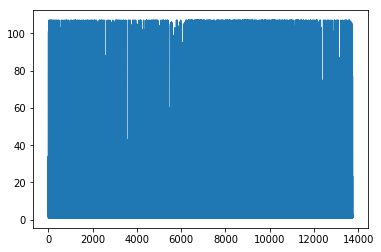

107
1


In [14]:
plt.plot(reduced_gene_count)
plt.show()
print max(reduced_gene_count)
print min(reduced_gene_count)



# METADATA 

In [15]:
META.head()

,NOTES,PATHOTYPE,Source,CD,UC,IBD,Phylogroup,Commensal/Pathogenic
Strain,,,,,,,,
12-1-TI12,AIEC,InPec: AIEC,Terminal Ileum Biopsy,0,0,0,B2,AIEC
12-2-TI13,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0,B2,Commensal
18-3-TI5,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0,B2,Commensal
18-4-TI12,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0,B2,Commensal
3_2_53FAA,Commensal IBD,InPec: non-AIEC,Faecal,1,0,1,B2,Commensal


In [16]:
Notes=META['NOTES']
Pathotype=META['PATHOTYPE']
Source=META['Source']
Phylogroup=META['Phylogroup']
Com_Path=META['Commensal/Pathogenic']


In [17]:
def unique(list1):
    unique_list = []
     # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list           

In [18]:
list_of_lists=[Notes,Pathotype,Source,Phylogroup,Com_Path]
for lists in list_of_lists:
    print '%s : %s'% (lists.name, unique(lists))
    

NOTES : [u'AIEC', u'Commensal IBD', u'Commensal', u'EAEC', u'UPEC', u'APEC', u'ETEC', u'ExPEC', u'EHEC', u'EPEC', u'Shigella']
PATHOTYPE : [u'InPec: AIEC', u'InPec: non-AIEC', u'Commensal', u'InPec: EAEC', u'ExPec: UPEC', u'ExPec', u'InPec: EHEC', u'InPec: EPEC', u'ExPec: Envisolate', u'Shigella']
Source : [u'Terminal Ileum Biopsy', u'Faecal', u'Apthous Ulcer Biopsy', u'Lymph Node', u'biopsy', u'intestinal mucosa', u'Urinary', u'avian', u'fecal', u'Unknown', u'Colon', u'cerebro-spinal fluid', u'Bloodstream', u'Bladder', u'colon biopsy', u'ileum']
Phylogroup : [u'B2', u'A', u'D', u'B1', u'E', u'F', u'Unknown']
Commensal/Pathogenic : [u'AIEC', u'Commensal', u'EAEC', u'UPEC', u'APEC', u'ETEC', u'ExPEC', u'EHEC', u'EPEC', u'Shigella']


In [19]:
Notes_dict={}
Pathotype_dict={}
Source_dict={}
Phylogroup_dict={}
Com_Path_dict={}

In [ ]:
import matplotlib.cm as cm


In [ ]:
colors = ['#F0F8FF','#FAEBD7','#00FFFF','#7FFFD4','#F5F5DC','#FFE4C4','#00FFFF','#00008B', '#008B8B','#B8860B','#8B008B','#DC143C','#00FFFF','#00008B', '#008B8B','#B8860B','#8B008B',]
colors_dict=dict(zip(range(len(colors)),colors))
colors_dict[2]
colors_dict[5]

# Correlate colors with Metadata


In [ ]:
def uniq_rep( LIST):
    unique_list=unique(LIST)
    print '%s Number of unique items: %s' % (LIST.name,len(unique_list))
    color_list=[]
    num_rep_list=[]
    color_unique=[]
    for i in unique_list:
        loc=unique_list.index(i)
        color_unique.append(str(colors_dict[loc]))
    for i in LIST:
        if i in unique_list:
            loc=unique_list.index(i)
            num_rep_list.append(loc)
    if len(num_rep_list)==len(LIST):
        for i in num_rep_list:
            color_list.append(str(colors_dict[i]))
    if len(color_list)==len(LIST)==len(color_list):   
        print ("ALL DIMENSIONS MATCH")
    else:
        print ('TRY AGAIN')
    return num_rep_list , color_list, unique_list

In [ ]:
Notes_Num, Notes_Colors, Notes_c_unique=uniq_rep(Notes)
print len(Notes_Colors)
print len(Notes)


Pathotype_Num,Pathotype_Colors, Pathotype_c_unique=uniq_rep(Pathotype)
print len(Pathotype_Colors)
print len(Pathotype)

Source_Num,Source_Colors, Source_c_unique=uniq_rep(Source)
print len(Source_Colors)
print len(Source)

Phylogroup_Num, Phylogroup_Colors, Phylogroup_c_unique=uniq_rep(Phylogroup)
print len(Phylogroup_Colors)
print len(Phylogroup)

Com_Path_Num,Com_Path_Colors, Com_Path_c_unique=uniq_rep(Com_Path)
print len(Com_Path_Colors)
print len(Com_Path)


# PCA 

In [ ]:
def PCA_fx(matrix, n): 
    import numpy as np
    from sklearn.decomposition import PCA
    PCA_matrix=[]
    for i in range(n):
        X = np.array(matrix)
        pca = PCA(n_components=i+1)
        pca.fit(X)
        PCA_matrix.extend([[i+1,pca.explained_variance_ratio_,pca.singular_values_]])
    return PCA_matrix

In [ ]:
PCA1=PCA_fx(base_reduced, 5 )
label=['Number of Components', 'explained_variance_ratio_','singular_values_']
PCA_plot=pd.DataFrame.from_records(PCA1, columns=label)
PCA_plot

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [ ]:
m=len(Notes_c_unique)
colors[1:len(Notes_c_unique)]

In [ ]:
notes

In [ ]:
notes={
    'Color': Notes_Colors,
    'Number': Notes_Num
}
notes_legend={
    'Color': (colors[0:len(Notes_c_unique)]),
    'Label': Notes_c_unique
}
print len(Notes_Num)
notes_legend
notes_dict=pd.DataFrame(data=notes)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA


X =base_reduced
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data


# plot principal components
X_pca = pca.transform(X)
for i in range(len(Notes_Colors)):
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2, c=Notes_Colors)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))
ax[1].legend(shadow=True, fancybox=True)

fig.savefig('PCA-rotation.png')

In [ ]:


X =base_reduced
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

# plot principal components
X_pca = pca.transform(X)
for i in range(108):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2, c=Notes_Colors)
plt.legend(Notes_c_unique, )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

In [ ]:
notes_dict["x"]=X_pca[:,0]
notes_dict["y"]=X_pca[:,1]

In [ ]:
fig, ax = plt.subplots()

grouped = notes_dict.groupby('Color')
for key, group in grouped:
    ax.scatter(group.x, group.y, c = key, s = 50)
draw_vector([0, 0], [0, 3], ax=ax)
draw_vector([0, 0], [3, 0], ax=ax)
ax.legend(Notes_c_unique,loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
ax.grid()
plt.xlabel('First Principal Component')   
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
ax.axis('equal')
plt.show()
    


In [ ]:
notes_dict

In [ ]:

grouped = notes_dict.groupby('Type')
for key, group in grouped:
    ax.scatter(group.x, group.y, s = 50, c=group.Color)
ax.legend(group.Type,loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
ax.grid()
plt.show()
    

In [ ]:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])


In [ ]:
notes_dict['Type']=list(Notes)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = Notes_c_unique
colors = colors[0:len(Notes_c_unique)]
for target, color in zip(targets,colors):
    indicesToKeep = notes_dict['Type'] == target
    ax.scatter(X_pca.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
g,df_val_cog = plot_by_group((X_pca[i, 0], X_pca[i, 1] df_cog_locus, col_group=col_group, col='condition', hue=col_group)

In [ ]:
for key, group in Notes_c_unique:
    group.plot(ax=ax, kind='scatter', x='carat', y='price', label=key, color=colors[key])

In [ ]:
grouped = df.groupby('color')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='carat', y='price', label=key, color=colors[key])

plt.show()

In [ ]:
X_pca.shape

In [ ]:
ax[2].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[2].axis('equal')
ax[2].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

ax[3].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[3].axis('equal')
ax[3].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

ax[4].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[4].axis('equal')
ax[4].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

ax[5].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[5].axis('equal')
ax[5].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

In [ ]:
import seaborn as sns
X =base_reduced
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

# plot principal components
X_pca = pca.transform(X)
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x=0, y=1, data=X_pca, fit_reg=False, hue=Notes_Colors, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
X =base_reduced
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

# plot principal components
X_pca = pca.transform(X)

df = pd.DataFrame(dict("X "= X_pca[:,0], "Y"= X_pca[:,1], color=Notes_Colors))

sns.lmplot("X", "Y", data=df, hue='color', fit_reg=False)

plt.show()


In [ ]:
Notes_Colors